# Eco-diplomatie - Team FOWAC

In [113]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from IPython.display import display_html
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

from scipy import stats
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Import dataset & traitements valeurs manquantes

In [114]:
# Import dataset avec exclusion header & footer
df = pd.read_excel('DATABASE.xls', index_col=0, skiprows=[0,1,2], skipfooter=42) 

# Rename columns
df = df.rename(columns={'Sender c': 'Sender1', 
                        'Sender 2c': 'Sender2', 
                        'Sender 3c': 'Sender3', 
                        'Targetd': 'Target',
                        'US casee': 'US_case', 
                        'US unilateral casef': 'US_unilateral_case', 
                        'Foreign policy goal categoryg': 'Goal_categ', 
                        'First yearh': 'First_year',
                        'Last yeari': 'Last_year', 
                        'Policy resultj': 'Policy_result', 
                        'Sanctions contributionk': 'Sanctions_contrib',
                        'Success \nscorel': 'Success_score', 
                        'Companion policiesm': 'Comp_policies', 
                        'International cooperationn':'Int_coop', 
                        'International assistanceo': 'Int_assistance', 
                        'Cooperating international organizationp': 'Coop_int_org',
                        'International organization senderq': 'Int_org_sender', 
                        'International organization sender & target membersr': 'Int_org_sender_&_target_members', 
                        'Length (years)s': 'Length_years',
                        'Prior relationst': 'Prior_relations', 
                        'Regime Type \n(DEMOC 1st year)u': 'Regime_type', 
                        'Regime Type2 (Polity2 1st year)v': 'Regime_type2', 
                        'Regime Type3 \n(Scale 1st year)w': 'Regime_type3',
                        'Political stability priorx': 'Political_stability_prior', 
                        'Political stability duringy': 'Political_stability_during',
                        'Cost to targetz': 'Cost_to_target', 
                        'Cost to target (percent of GNP)aa': 'Cost_to_target_%GNP',
                        'Cost to target per capitabb': 'Cost_to_target_per_capita', 
                        'Trade linkagecc': 'Trade_linkage', 
                        'GNP \nratiodd': 'GNP_ratio',
                        'Health and stabilityee': 'Health_&_stability', 
                        'Sanction typeff': 'Sanction_type', 
                        'Cost to sendergg': 'Cost_to_sender',
                        'GDP growth (percent, 5-year average)hh': 'GDP_growth%5years_average', 
                        'Inflation (percent,\n 3-year average)ii':'Inflation%3years_average', 
                        'Target International Monetary Fund codejj': 'Target_int_monetary_code', 
                        'Country groupkk': 'Country_group'
                       })
# rename index
df.index.names = ['id_case']

# Remplacement des '--' en 0 puis conversion en numérique
df['Cost_to_target_%GNP'] = df['Cost_to_target_%GNP'].astype('str')
df['Cost_to_target_%GNP'] = df['Cost_to_target_%GNP'].str.replace('--', '0')
df['Cost_to_target_%GNP'] = pd.to_numeric(df['Cost_to_target_%GNP'])

# # Remplacement des '--' en 0 puis conversion en numérique
df['Cost_to_target'] = df['Cost_to_target'].astype('str')
df['Cost_to_target'] = df['Cost_to_target'].str.replace('--', '0')
df['Cost_to_target'] = pd.to_numeric(df['Cost_to_target'])

# # Remplacement des '--' en 0 puis conversion en numérique
df['Cost_to_target_per_capita'] = df['Cost_to_target_per_capita'].astype('str')
df['Cost_to_target_per_capita'] = df['Cost_to_target_per_capita'].str.replace('--', '0')
df['Cost_to_target_per_capita'] = pd.to_numeric(df['Cost_to_target_per_capita'])

# df[['Cost_to_target_%GNP', 'Cost_to_target', 'Cost_to_target_per_capita']].dtypes

#  remplacement des n.a. par NaN
df['GDP_growth%5years_average'] = df['GDP_growth%5years_average'].astype('str')
df['GDP_growth%5years_average'] = df['GDP_growth%5years_average'].str.replace('n.a.', '')
df['GDP_growth%5years_average'] = pd.to_numeric(df['GDP_growth%5years_average'])

df['GDP_growth%5years_average'].head()
# df['GDP_growth%5years_average'].dtypes
# df['GDP_growth%5years_average'].isna().sum()

# Suppression de la virgule '--' restent tels quels
df['Comp_policies'] = df['Comp_policies'].str.replace(',', '')
# df['Comp_policies'].head()

In [115]:
df.head()

,Sender1,Sender2,Sender3,Target,Goal,US_case,US_unilateral_case,Goal_categ,First_year,Last_year,Policy_result,Sanctions_contrib,Success_score,Comp_policies,Int_coop,Int_assistance,Coop_int_org,Int_org_sender,Int_org_sender_&_target_members,Length_years,Prior_relations,Regime_type,Regime_type2,Regime_type3,Political_stability_prior,Political_stability_during,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,Trade_linkage,GNP_ratio,Health_&_stability,Sanction_type,Cost_to_sender,GDP_growth%5years_average,Inflation%3years_average,Target_int_monetary_code,Country_group
id_case,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14-1,UNITED KINGDOM,NaN,NaN,GERMANY,Military victory,0,0,4,1914,1918,4,3,12,R,4,A,--,0,0,4,1,5,2,2,0,0,843.0,7.1,12.58,9,1.0,3,"F,X,M",4,3.58,2.86667,134,1
17-1,UNITED STATES,NaN,NaN,JAPAN,Shipping for Allies,1,1,5,1917,1918,2,2,4,--,1,--,--,0,0,1,2,5,1,2,0,0,23.0,0.8,0.44,20.5,13.0,3,X,2,5.40,25.6,158,1
18-1,UNITED KINGDOM,NaN,NaN,RUSSIA,Destabilize Bolsheviks,0,0,2,1918,1920,1,2,2,RQ,4,--,--,0,0,2,1,1,-1,2,0.1,0,446.0,4.1,2.49,18.5,1.0,1,"F,X,M",3,NaN,n.a.,922,2
21-1,LEAGUE OF NATIONS,NaN,NaN,YUGOSLAVIA,Military disruption vs. Albania,0,0,3,1921,1921,4,4,16,--,4,--,--,1,1,1,2,3,0,2,0.4,0,0.0,0.0,0.00,26.5,37.0,2,--,2,-1.50,n.a.,188,2
25-1,LEAGUE OF NATIONS,NaN,NaN,GREECE,Withdraw from Bulgaria,0,0,3,1925,1925,4,4,16,--,4,--,--,1,1,1,2,0,-6,1,0.9,0,0.0,0.0,0.00,36,56.0,2,--,2,3.30,48.8,174,1


### Variables Quantitatives et Qualitatives

In [116]:
# display side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# display categoric & quantiv vars
df_categ = df.select_dtypes(include=['object']).columns
df_quant = df.select_dtypes(include=['int','float64']).columns
quant = pd.DataFrame.from_dict({'Numeric_var': df_quant})
categ = pd.DataFrame.from_dict({'Categ_vars': df_categ})
display_side_by_side(quant,categ)

,Numeric_var
0,US_case
1,US_unilateral_case
2,Goal_categ
3,First_year
4,Policy_result
5,Sanctions_contrib
6,Success_score
7,Int_coop
8,Int_org_sender
9,Int_org_sender_&_target_members


### Describe Numeric Variables

In [117]:
# list quantiv variables
df_quant = df.select_dtypes(include=['int','float64'])
list(df.select_dtypes(include=['int','float64']).columns)
df_quant.describe()

,US_case,US_unilateral_case,Goal_categ,First_year,Policy_result,Sanctions_contrib,Success_score,Int_coop,Int_org_sender,Int_org_sender_&_target_members,Length_years,Prior_relations,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,GNP_ratio,Health_&_stability,Cost_to_sender,GDP_growth%5years_average,Country_group
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,186.000000,204.000000
mean,0.686275,0.348039,2.651961,1975.279412,2.642157,2.446078,6.926471,2.093137,0.254902,0.220588,7.053922,2.098039,457.345015,2.671495,30.659529,1910.267549,1.995098,1.941176,3.184562,3.495098
std,0.465148,0.477520,1.383024,19.239619,1.120515,0.757253,4.171152,1.085576,0.436878,0.415663,9.626627,0.749513,2045.643232,6.578428,118.860966,6811.603934,0.752648,0.804220,4.660725,1.729197
min,0.000000,0.000000,1.000000,1914.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-182.000000,-6.300000,-6.450000,0.040000,1.000000,1.000000,-18.980000,1.000000
25%,0.000000,0.000000,2.000000,1963.000000,2.000000,2.000000,4.000000,1.000000,0.000000,0.000000,1.000000,2.000000,9.937500,0.040000,0.400000,13.750000,1.000000,1.000000,1.420000,2.000000
50%,1.000000,0.000000,2.000000,1979.000000,3.000000,2.000000,6.000000,2.000000,0.000000,0.000000,3.500000,2.000000,54.500000,0.700000,2.435000,104.500000,2.000000,2.000000,3.282222,3.000000
75%,1.000000,1.000000,4.000000,1991.000000,4.000000,3.000000,9.000000,3.000000,1.000000,0.000000,7.000000,3.000000,213.250000,2.600000,11.417500,577.725000,3.000000,2.000000,5.310000,5.000000
max,1.000000,1.000000,5.000000,2002.000000,4.000000,4.000000,16.000000,4.000000,1.000000,1.000000,60.000000,3.000000,18800.000000,54.000000,1093.000000,50869.000000,3.000000,4.000000,33.340000,6.000000


## 4. Visualisations

### Principaux auteurs de sanctions

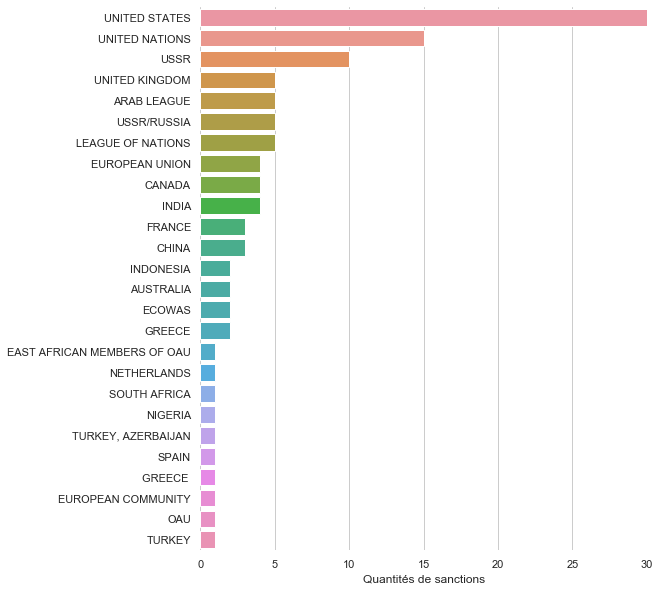

In [118]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df['Sender1'].value_counts(), y=df['Sender1'].value_counts().index)

# Add a legend and informative axis label
ax.set(xlim=(0, 30), ylabel="", xlabel="Quantités de sanctions")
sns.despine(left=True, bottom=True)

### Principaux motifs de sanctions

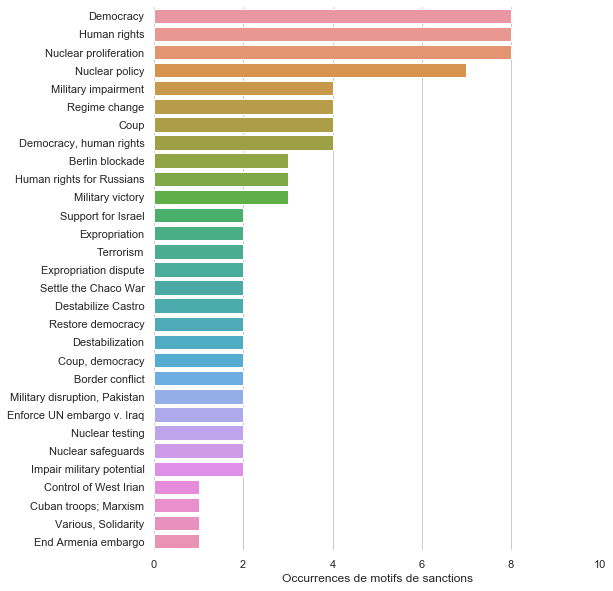

In [119]:
# Initialize matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df['Goal'].value_counts()[:30], y=df['Goal'].value_counts()[:30].index)

# Add a legend and informative axis label
ax.set(xlim=(0, 10), ylabel="", xlabel="Occurrences de motifs de sanctions")
sns.despine(left=True, bottom=True)

### Pays les plus impactés financièrement par les sanctions (Cost_to_target)

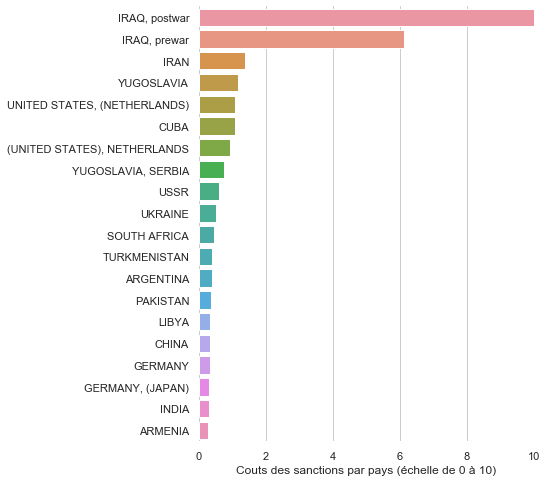

In [120]:
df_costs = df[['Target', 'Cost_to_target']].groupby(['Target']).sum().sort_values(by='Cost_to_target', ascending=False)
df_costs['Cost_to_target'].head()

X = df_costs['Cost_to_target'].values #returns a numpy array
scaler = preprocessing.MinMaxScaler(feature_range=(0, 10))
df_costs['costs'] = scaler.fit_transform(X.reshape(-1,1))
# df_costs[:5]  

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 8))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df_costs[:20].costs, y=df_costs[:20].index)

# Add a legend and informative axis label
ax.set(xlim=(0, 10), ylabel="", xlabel="Couts des sanctions par pays (échelle de 0 à 10)")
sns.despine(left=True, bottom=True)

### Pays les plus impactés financièrement par les sanctions (Cost_to_target_per_capita)

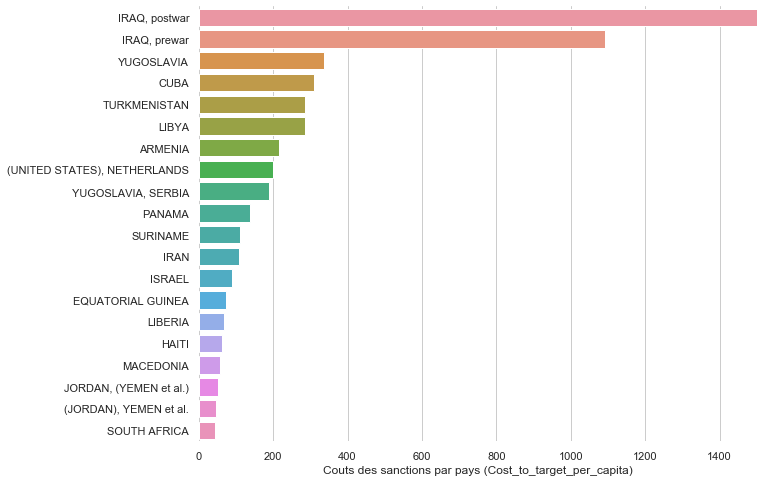

In [121]:
df_costs_capita = df[['Target', 'Cost_to_target_per_capita']].groupby(['Target']).sum().sort_values(by='Cost_to_target_per_capita', ascending=False)
# df_costs_capita[:20]  

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df_costs_capita[:20].Cost_to_target_per_capita, y=df_costs_capita[:20].index)

# Add a legend and informative axis label
ax.set(xlim=(0, 1500), ylabel="", xlabel="Couts des sanctions par pays (Cost_to_target_per_capita)")
sns.despine(left=True, bottom=True)

### Success score

In [122]:
# df_success_score = df[['Success_score']].groupby(df.index).sum().sort_values(by='Success_score', ascending=False)
# # df_costs_capita[:20]  

# # Initialize the matplotlib figure
# f, ax = plt.subplots(figsize=(10, 8))

# # Plot 
# sns.set_color_codes("muted")
# sns.barplot(x=df_success_score[:20].Success_score, y=df_success_score[:20].index)

# # Add a legend and informative axis label
# ax.set(xlim=(0, 40), ylabel="", xlabel="Couts des sanctions par pays (Cost_to_target_per_capita)")
# sns.despine(left=True, bottom=True)

# # df_success_score.head()
# # df[['Target', 'Success_score']].head()

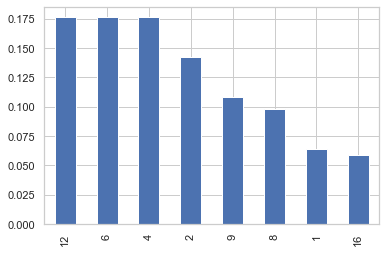

In [123]:
# Barplot
df['Success_score'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [124]:
#df['Success_score'].value_counts(normalize=True).plot(kind='pie')

In [125]:
df_correlation = df[["Success_score", "Inflation%3years_average", "Target_int_monetary_code",
                            "GDP_growth%5years_average","Cost_to_sender","Sanction_type"]]
corr = df_correlation.corr()
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
cmap = sns.diverging_palette(150, 275, s=40, l=70, n=9, as_cmap=True)
corr.style.background_gradient(cmap=cmap).set_precision(2)

,Success_score,GDP_growth%5years_average,Cost_to_sender
Success_score,1.00,-0.05,-0.12
GDP_growth%5years_average,-0.05,1.00,-0.07
Cost_to_sender,-0.12,-0.07,1.00


In [126]:
df_correlation = df[["Success_score","Cost_to_target","Cost_to_target_%GNP","Cost_to_target_per_capita",
                             "Trade_linkage","GNP_ratio","Regime_type2"]]
cmap = sns.diverging_palette(150, 275, s=40, l=70, n=9, as_cmap=True)
corr = df_correlation.corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
corr.style.background_gradient(cmap=cmap).set_precision(2)

,Success_score,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,GNP_ratio
Success_score,1.00,-0.07,0.03,-0.04,-0.01
Cost_to_target,-0.07,1.00,0.81,0.96,-0.05
Cost_to_target_%GNP,0.03,0.81,1.00,0.83,0.14
Cost_to_target_per_capita,-0.04,0.96,0.83,1.00,-0.02
GNP_ratio,-0.01,-0.05,0.14,-0.02,1.00


## Partie modélisation


In [127]:
# Defining X as all variables different from 'Success score', 'Policy result' and 'sanction contriution' and dropping 
# the last two as they are correlated with the first one.
data_table = df.drop(['Policy_result', 'Sanctions_contrib'], axis=1)

# Copying 'Success score' column then dropping the first (to have it as last column)
data_table['Success score'] = data_table['Success_score']
data_table = data_table.drop(['Success_score'], axis=1)

# Replacing remaining inconsistent values ('--' and 'n.a.') for MLP classifier
data_table = data_table.replace(to_replace='--', value= None)
data_table = data_table.replace(to_replace='n.a.', value= None)

# Dropping 'Sender 2/3' columns as they have lot of NaNs
data_table = data_table.drop(['Sender2','Sender3'], axis =1)

data_table.head()

,Sender1,Target,Goal,US_case,US_unilateral_case,Goal_categ,First_year,Last_year,Comp_policies,Int_coop,Int_assistance,Coop_int_org,Int_org_sender,Int_org_sender_&_target_members,Length_years,Prior_relations,Regime_type,Regime_type2,Regime_type3,Political_stability_prior,Political_stability_during,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,Trade_linkage,GNP_ratio,Health_&_stability,Sanction_type,Cost_to_sender,GDP_growth%5years_average,Inflation%3years_average,Target_int_monetary_code,Country_group,Success score
id_case,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14-1,UNITED KINGDOM,GERMANY,Military victory,0,0,4,1914,1918,R,4,A,--,0,0,4,1,5,2,2,0,0,843.0,7.1,12.58,9,1.0,3,"F,X,M",4,3.58,2.86667,134,1,12
17-1,UNITED STATES,JAPAN,Shipping for Allies,1,1,5,1917,1918,R,1,A,--,0,0,1,2,5,1,2,0,0,23.0,0.8,0.44,20.5,13.0,3,X,2,5.40,25.6,158,1,4
18-1,UNITED KINGDOM,RUSSIA,Destabilize Bolsheviks,0,0,2,1918,1920,RQ,4,A,--,0,0,2,1,1,-1,2,0.1,0,446.0,4.1,2.49,18.5,1.0,1,"F,X,M",3,NaN,25.6,922,2,2
21-1,LEAGUE OF NATIONS,YUGOSLAVIA,Military disruption vs. Albania,0,0,3,1921,1921,RQ,4,A,--,1,1,1,2,3,0,2,0.4,0,0.0,0.0,0.00,26.5,37.0,2,--,2,-1.50,25.6,188,2,16
25-1,LEAGUE OF NATIONS,GREECE,Withdraw from Bulgaria,0,0,3,1925,1925,RQ,4,A,--,1,1,1,2,0,-6,1,0.9,0,0.0,0.0,0.00,36,56.0,2,--,2,3.30,48.8,174,1,16


#### Encodage de variables catégorielles en variables numériques

In [128]:
lb_make = LabelEncoder()

# Transforming categorical values to numeeric values
for c in data_table.columns:
    if(data_table[c].dtype == 'O'):
        data_table[c] = lb_make.fit_transform(data_table[c])
        #print(type(c))   

data_table.head()

,Sender1,Target,Goal,US_case,US_unilateral_case,Goal_categ,First_year,Last_year,Comp_policies,Int_coop,Int_assistance,Coop_int_org,Int_org_sender,Int_org_sender_&_target_members,Length_years,Prior_relations,Regime_type,Regime_type2,Regime_type3,Political_stability_prior,Political_stability_during,Cost_to_target,Cost_to_target_%GNP,Cost_to_target_per_capita,Trade_linkage,GNP_ratio,Health_&_stability,Sanction_type,Cost_to_sender,GDP_growth%5years_average,Inflation%3years_average,Target_int_monetary_code,Country_group,Success score
id_case,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14-1,21,43,105,0,0,4,1914,0,4,4,0,0,0,0,4,1,7,13,1,0,0,843.0,7.1,12.58,27,1.0,3,4,4,3.58,27,3,1,12
17-1,23,60,130,1,1,5,1917,0,4,1,0,0,0,0,1,2,7,12,1,0,0,23.0,0.8,0.44,50,13.0,3,6,2,5.40,113,7,1,4
18-1,21,96,37,0,0,2,1918,1,5,4,0,0,0,0,2,1,3,10,1,1,0,446.0,4.1,2.49,45,1.0,1,4,3,NaN,113,87,2,2
21-1,13,122,98,0,0,3,1921,2,5,4,0,0,1,1,1,2,5,11,1,4,0,0.0,0.0,0.00,61,37.0,2,0,2,-1.50,113,13,2,16
25-1,13,45,139,0,0,3,1925,3,5,4,0,0,1,1,1,2,2,5,0,8,0,0.0,0.0,0.00,73,56.0,2,0,2,3.30,126,9,1,16


In [129]:
# Filling null values with 0
data_table = data_table.fillna(0)

data_table2 = data_table.drop(['Case no.b', 'US_case','Sender1','Target','US_unilateral_case',
                              'Goal','First_year','Last_year','Int_org_sender'], axis=1)

nbre_col = data_table2.shape[1] - 1

KeyError: "['Case no.b'] not found in axis"

In [130]:
# Splitting data for training and test set
X, y = data_table2.iloc[:,:nbre_col], data_table2['Success score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

NameError: name 'data_table2' is not defined

## Régression linéaire

In [553]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)           # réduction 
pred2 = model.predict(X_test)           # modele pour predire l'echantillon test 
# print(pred2)

In [554]:
#les coeffictients B0, B1, B2 du modèle linéaire
#print(" Les coeffients ")
#print("----------------------")
#print(pd.Series(model.coef_, index = X.columns)) # Print coefficients
print("----------------------")
# la méthode des moindres carrés estime l'écart entre la valeur prédite et la valeur observée
print("MSE est :", mean_squared_error(y_test, pred2)) 
#print(r2_score(y_test, pred2))

----------------------
MSE est : 17.581040677027115


In [555]:
print('r2 score = ', r2_score(y_test, pred2))  

r2 score =  0.0691194181839968


## régression linéaire avec statsmodels

In [556]:
model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          Success score   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              26.36
Date:                Thu, 30 Apr 2020   Prob (F-statistic):                    1.28e-46
Time:                        13:56:18   Log-Likelihood:                         -561.97
No. Observations:                 204   AIC:                                      1172.
Df Residuals:                     180   BIC:                                      1252.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

### Lasso

In [557]:
#generer un alpha quelconque pour test 
alphas = 10**np.linspace(10,-2,100)*0.5

#### Coefficients

In [558]:
#générer une boucle pour récupérer les coeffs
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

#### représentation graphique du modèle

In [559]:
"""ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')"""


"ax = plt.gca()\nax.plot(alphas*2, coefs)\nax.set_xscale('log')\nplt.axis('tight')\nplt.xlabel('alpha')\nplt.ylabel('weights')"

#### fit et prediction

In [560]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

print("---------------------------")
pred = lasso.predict(X_test)
#print(pred)
#print("---------------------------")

print("MSE est : ", mean_squared_error(y_test, pred))
# mean_squared_error(y_test, lasso.predict(X_test))

---------------------------
MSE est :  17.402897129383703


In [561]:
print('r2 score = ', r2_score(y_test, pred))  

r2 score =  0.07855175909733958


### RIDGE

In [562]:
#methode de Ridge
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)   #reduction
    coefs.append(ridge.coef_)    
np.shape(coefs)

(100, 25)

#### représentation graphique du modèle

In [563]:
"""ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')"""

"ax = plt.gca()\nax.plot(alphas, coefs)\nax.set_xscale('log')\nplt.axis('tight')\nplt.xlabel('alpha')\nplt.ylabel('weights')"

#### construction du modèle et MSE

In [564]:
## alpha = 4 par défaut
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # donnees d'apprentissage

pred2 = ridge2.predict(X_test)           # prediction sur l'échantillon test 
print("MSE est :", mean_squared_error(y_test, pred2))          # MSE

MSE est : 17.53031282178602


In [565]:
## pour un alpha grand alpha = 10**10
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # donnees d'apprentissage
pred3 = ridge3.predict(X_test)           # prediction sur l'échantillon test

print("MSE est :",mean_squared_error(y_test, pred3))          # l'erreur MSE est plus grand quand alpha augmente

MSE est : 18.888408303433664


In [566]:
## alpha = 0 : ça revient à faire la régression linéaire
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # donnees d'apprentissage
pred = ridge2.predict(X_test)            # prediction sur l'échantillon test

print(mean_squared_error(y_test, pred))           # l'erreur est petite et équivaut à celle de la régression linéaire plus haut

17.581040677026987


#### Validation croisée

In [567]:
# on fait la validation croisée pour récupérer notre vrai valeur alpha ici égal à 0.005
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
# ridgecv.alpha_
# le meilleur alpha à conserver est 3.0679536367065814

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [568]:
### Maintenant ridge avecc alphacv = 3.0679536367065814
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
print("---------------------------")
pred = ridge4.predict(X_test)

print("MSE est : ", mean_squared_error(y_test, pred))  # Comme notre valeur alpha est bonne l'erreur est petite et équivaut de 0.0005
# c le modèle final de Ridge qui est retenu 

---------------------------
MSE est :  17.17493876174268


In [569]:
print('r2 score = ', r2_score(y_test, pred))  

r2 score =  0.09062169408001564


#### Partie entrainement  (supervisée):

##### Avec modèle NN


In [570]:
# Filling null values with 0
data_table = data_table.fillna(0)

# Splitting data for training and test set
X, y = data_table.iloc[:,:33], data_table['Success score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Choosing MLP classifier for NN
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Neural network model accuracy (discrete target variable) :")
print("Accuracy on training set : {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set : {:.2f}".format(mlp.score(X_test, y_test)))

Neural network model accuracy (discrete target variable) :
Accuracy on training set : 0.62
Accuracy on test set : 0.21


C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##### Réentrainement du modèle NN avec un changement de la variable cible "Success score" en variable booléenne

In [571]:
# If 'Success score' >=9, y=1, y=0 otherwise. 
yb = [0 if(i<9) else 1 for i in y]

X_train, X_test, y_train, y_test = train_test_split(X, yb, test_size=0.33, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Neural network model accuracy (boolean target variable) :")
print("Accuracy on training set : {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set : {:.2f}".format(mlp.score(X_test, y_test)))

Neural network model accuracy (boolean target variable) :
Accuracy on training set : 0.65
Accuracy on test set : 0.66


On peut voir que les résultats sont meilleurs avec une variable boolénenne comme cible.

##### Avec modèle arbre de décision

In [572]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Decision tree model accuracy :")
print("Accuracy on training set : {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test, y_test)))

Decision tree model accuracy :
Accuracy on training set : 1.000
Accuracy on test set : 0.618


Meilleurs résultats qu'avec un modèle NN.

##### Avec modèle arbre de décision : Feature importance 

In [573]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.0275974  0.         0.02761844 0.20543951 0.         0.
 0.01609848 0.         0.08543771 0.         0.         0.
 0.         0.         0.         0.07214441 0.07317493 0.
 0.         0.         0.         0.         0.         0.08341785
 0.12965585 0.04513889 0.         0.         0.         0.03219697
 0.03577441 0.07991653 0.08638861]


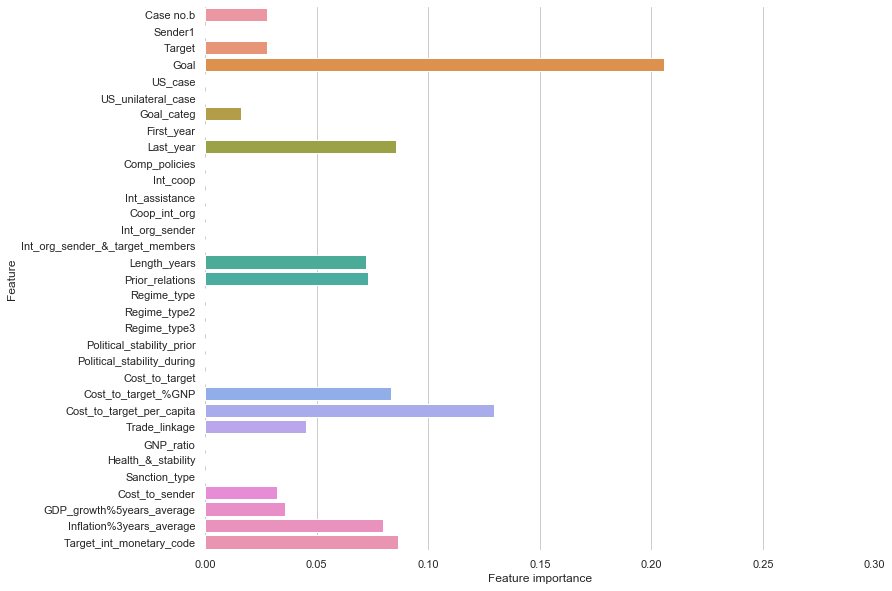

In [574]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x= tree.feature_importances_, y = data_table.columns[:33])

# Add a legend and informative axis label
ax.set(xlim=(0, 0.3), ylabel="Feature", xlabel="Feature importance")
sns.despine(left=True, bottom=True)

#### Avec modèle Random forest : 

In [575]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Random forest model accuracy :")
print("Accuracy on training set : {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set : {:.3f}".format(forest.score(X_test, y_test)))

Random forest model accuracy :
Accuracy on training set : 1.000
Accuracy on test set : 0.706


## Conclusion

Notre étude nous a ramené à conclure que le meilleur modèle pour prédire q'une santion sera un succès ou un échec est la 
méthode avec un modèle Random Forest.

Les caractéristiques qui influent sur le succès ou l'échèc d'une sanction sont : Prior_relations, Cost_to_target, Sanction_type, Inflation%3years_average, Cost_to_sender.